In [1]:
import pandas as pd
import numpy as np

#df1 includes both active and inactive players
df1 = pd.read_csv('NBA_AllTimeLeader.csv')
#df2 includes only active players
df2 = pd.read_csv('NBA_AllTimeLeader_Active.csv')
hof = []
with open('HOF.csv', 'r') as f:
    for line in f:
        hof.append(line.strip())

In [2]:
hof

['Kareem Abdul-Jabbar',
 'Ray Allen',
 'Nate Archibald',
 'Paul Arizin',
 'Al Attles',
 'Charles Barkley',
 'Don Barksdale',
 'Rick Barry',
 'Elgin Baylor',
 'Zelmo Beaty',
 'Walt Bellamy',
 'Dave Bing',
 'Larry Bird',
 'Chris Bosh',
 'Bill Bradley',
 'Carl Braun',
 'Kobe Bryant',
 'Al Cervi',
 'Wilt Chamberlain',
 'Maurice Cheeks',
 'Nat Clifton',
 'Chuck Cooper',
 'Bob Cousy',
 'Dave Cowens',
 'Billy Cunningham',
 'Louie Dampier',
 'Bob Dandridge',
 'Mel Daniels',
 'Adrian Dantley',
 'Bob Davies',
 'Dave DeBusschere',
 'Vlade Divac',
 'Clyde Drexler',
 'Joe Dumars',
 'Tim Duncan',
 'Alex English',
 'Julius Erving',
 'Patrick Ewing',
 'Walt Frazier',
 'Joe Fulks',
 'Harry Gallatin',
 'Kevin Garnett',
 'George Gervin',
 'Artis Gilmore',
 'Tom Gola',
 'Gail Goodrich',
 'Hal Greer',
 'Richie Guerin',
 'Cliff Hagan',
 'John Havlicek',
 'Connie Hawkins',
 'Elvin Hayes',
 'Spencer Haywood',
 'Tom Heinsohn',
 'Grant Hill',
 'Bob Houbregs',
 'Bailey Howell',
 'Dan Issel',
 'Allen Iverson',
 '

In [3]:
#drop duplicates from merging pts, ast, steal, reb, blk all-times
df1 = df1.drop_duplicates(subset='PLAYER')
df2 = df2.drop_duplicates(subset='PLAYER')

In [4]:
df1['HOF'] = [1.0 if player in hof else 0.0 for player in df1['PLAYER']]

In [5]:
df1['GP'] = pd.to_numeric(df1['GP'].str.replace(',',''))
df2['GP'] = pd.to_numeric(df2['GP'].str.replace(',',''))

In [6]:
df1

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
0,1,Michael Jordan,1072,38.3,30.1,11.4,22.9,49.7,0.5,1.7,...,1.6,4.7,6.2,5.3,2.3,0.8,2.7,50.9,56.9,1.0
1,2,Wilt Chamberlain,1045,45.8,30.1,12.1,22.5,54.0,NaN,NaN,...,NaN,NaN,22.9,4.4,NaN,NaN,NaN,54.0,54.7,1.0
2,3,Elgin Baylor,846,40.0,27.4,10.3,23.8,43.1,NaN,NaN,...,NaN,NaN,13.5,4.3,NaN,NaN,NaN,43.1,49.4,1.0
3,4,Kevin Durant,897,36.7,27.1,9.2,18.6,49.6,1.9,4.9,...,0.7,6.4,7.1,4.2,1.1,1.1,3.1,54.6,61.6,0.0
4,5,Jerry West,932,39.2,27.0,9.7,20.4,47.4,NaN,NaN,...,1,2.8,5.8,6.7,2.6,0.7,NaN,47.4,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,1232,Mike Muscala,407,6366.0,2473.0,892.0,1949.0,45.8,371,997,...,338,961,1299.0,366.0,139,195,250,55.3,58.5,0.0
5469,227,Kristaps Porzingis,304,9445.0,5694.0,2057.0,4655.0,44.2,552,1546,...,527,1849,2376.0,455.0,212,577,499,50.1,54.6,0.0
5472,231,Keon Clark,353,7973.0,2882.0,1179.0,2359.0,50.0,1,19,...,655,1441,2096.0,322.0,184,571,470,50.0,53.1,0.0
5484,242,Jawann Oldham,329,5241.0,1455.0,608.0,1269.0,47.9,0,3,...,431,922,1353.0,162.0,97,546,362,47.9,50.4,0.0


In [7]:
df2

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
0,1,Kevin Durant,897,36.7,27.1,9.2,18.6,49.6,1.9,4.9,...,0.7,6.4,7.1,4.2,1.1,1.1,3.1,54.6,61.6,0
1,2,LeBron James,1316,38.2,27.0,9.8,19.5,50.4,1.5,4.4,...,1.2,6.3,7.4,7.4,1.6,0.8,3.5,54.3,58.6,0
2,3,James Harden,890,34.4,25.1,7.4,16.7,44.4,2.8,7.7,...,0.8,4.7,5.5,6.6,1.6,0.5,3.7,52.8,61.1,0
3,4,Damian Lillard,695,36.3,24.6,8.1,18.4,43.8,3.0,8.0,...,0.6,3.6,4.2,6.6,1.0,0.3,2.8,51.9,58.2,0
4,5,Stephen Curry,774,34.3,24.3,8.3,17.5,47.6,3.7,8.7,...,0.7,3.9,4.6,6.5,1.7,0.2,3.1,58.3,62.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,141,Mike Muscala,408,6370.0,2475.0,893.0,1952.0,45.7,371.0,997.0,...,340.0,963.0,1303.0,366.0,139.0,195.0,252.0,55.3,58.4,0
310,34,Kristaps Porzingis,304,9445.0,5694.0,2057.0,4655.0,44.2,552.0,1546.0,...,527.0,1849.0,2376.0,455.0,212.0,577.0,499.0,50.1,54.6,0
606,45,Ben Simmons,275,9326.0,4382.0,1784.0,3188.0,56.0,5.0,34.0,...,523.0,1694.0,2217.0,2127.0,464.0,199.0,925.0,56.0,57.9,0
608,47,Trae Young,230,7639.0,5609.0,1796.0,4144.0,43.3,568.0,1631.0,...,157.0,750.0,907.0,2053.0,215.0,38.0,964.0,50.2,57.4,0


In [8]:
#Exclude active players because they 
#can't be in Hall of Fame until retired
df = df1[~df1.PLAYER.isin(df2.PLAYER)]

In [9]:
train = df[["GP", "MIN", "PTS", "REB", "AST", "STL", "BLK", "TOV", "EFG%", "TS%", "HOF"]]
print(train.isna().sum())

GP        0
MIN       0
PTS       0
REB       0
AST       0
STL     119
BLK     119
TOV     187
EFG%      0
TS%       0
HOF       0
dtype: int64


In [10]:
train['STL'] = train['STL'].fillna(train['STL'].median())
train['BLK'] = train['BLK'].fillna(train['BLK'].median())
train['TOV'] = train['TOV'].fillna(train['TOV'].median())
print(train.isna().sum())

GP      0
MIN     0
PTS     0
REB     0
AST     0
STL     0
BLK     0
TOV     0
EFG%    0
TS%     0
HOF     0
dtype: int64


C:\Users\ec778\AppData\Local\Temp/ipykernel_6904/598368201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['STL'] = train['STL'].fillna(train['STL'].median())
C:\Users\ec778\AppData\Local\Temp/ipykernel_6904/598368201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BLK'] = train['BLK'].fillna(train['BLK'].median())
C:\Users\ec778\AppData\Local\Temp/ipykernel_6904/598368201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [11]:
training_set = train.sample(frac=0.7, random_state=25)
training_set.head()

,GP,MIN,PTS,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
867,596,21.6,8.3,1.7,4.2,1,0.1,1.8,44.5,49.3,0.0
408,551,29.2,12.7,2.7,6.0,1.2,0.1,2.1,50.4,55.5,0.0
88,1392,34.0,19.0,10.8,3.0,0.7,2.2,2.4,50.7,55.1,1.0
731,946,24.6,9.4,1.9,5.5,1.4,0.1,1.7,47.1,51.8,0.0
145,768,33.5,17.4,8.1,2.0,0.7,0.3,1.6,50.2,53.9,0.0


In [12]:
dev_set = train.drop(training_set.index)
dev_set.head()

,GP,MIN,PTS,REB,AST,STL,BLK,TOV,EFG%,TS%,HOF
0,1072,38.3,30.1,6.2,5.3,2.3,0.8,2.7,50.9,56.9,1.0
2,846,40.0,27.4,13.5,4.3,0.8,0.3,1.5,43.1,49.4,1.0
11,1476,37.2,25.0,10.1,3.6,1.4,0.8,3.1,51.8,57.7,1.0
13,1074,35.5,24.8,6.7,2.5,1.3,0.6,2.5,47.8,53.6,1.0
19,658,37.0,24.2,4.2,5.4,1.4,0.3,3.7,44.1,50.0,1.0


In [13]:
train_set_y = training_set["HOF"]
train_set_x = training_set.drop(columns = ["HOF"])
dev_set_y = dev_set["HOF"]
dev_set_x = dev_set.drop(columns = ["HOF"])

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
train_X = train_set_x.to_numpy()
train_Y = train_set_y.to_numpy()
logreg.fit(train_X, train_Y)
train_y_pred = logreg.predict(train_X)
score = logreg.score(train_X, train_Y)
print(score)

0.9282238442822385


C:\Users\ec778\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn import metrics
test_X = dev_set_x.to_numpy()
test_Y = dev_set_y.to_numpy()
test_y_pred = logreg.predict(test_X)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_Y, test_y_pred)

In [16]:
print("Accuracy:",metrics.accuracy_score(test_Y, test_y_pred))
print("Precision:",metrics.precision_score(test_Y, test_y_pred))
print("Recall:",metrics.recall_score(test_Y, test_y_pred))

Accuracy: 0.9232954545454546
Precision: 0.7692307692307693
Recall: 0.4878048780487805


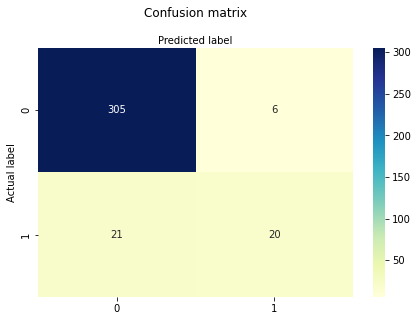

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Logreg.png')

## Predict whether active players will be in HOF

In [18]:
active = df2[["GP", "MIN", "PTS", "REB", "AST", "STL", "BLK", "TOV", "EFG%", "TS%"]]

In [19]:
print(active.isna().sum())

GP      0
MIN     0
PTS     0
REB     0
AST     0
STL     0
BLK     0
TOV     0
EFG%    0
TS%     0
dtype: int64


In [20]:
active_pred = logreg.predict(active)

In [21]:
print(list(zip(df2['PLAYER'], active_pred)))

[('Kevin Durant', 1.0), ('LeBron James', 1.0), ('James Harden', 1.0), ('Damian Lillard', 1.0), ('Stephen Curry', 1.0), ('Anthony Davis', 1.0), ('Russell Westbrook', 1.0), ('Devin Booker', 0.0), ('KarlNaNAnthony Towns', 1.0), ('Carmelo Anthony', 1.0), ('Kyrie Irving', 1.0), ('Bradley Beal', 0.0), ('Giannis Antetokounmpo', 1.0), ('Blake Griffin', 1.0), ('Paul George', 0.0), ('DeMar DeRozan', 1.0), ('Kemba Walker', 0.0), ('Klay Thompson', 0.0), ('Andrew Wiggins', 0.0), ('LaMarcus Aldridge', 0.0), ('Kawhi Leonard', 0.0), ('Zach LaVine', 0.0), ('John Wall', 1.0), ('CJ McCollum', 0.0), ('Nikola Jokic', 1.0), ('Derrick Rose', 0.0), ('Chris Paul', 1.0), ('Kevin Love', 1.0), ('Victor Oladipo', 0.0), ('Jimmy Butler', 0.0), ('Julius Randle', 0.0), ('Nikola Vucevic', 0.0), ('Khris Middleton', 0.0), ('Rudy Gay', 0.0), ('Eric Gordon', 0.0), ('Brook Lopez', 0.0), ('Tobias Harris', 0.0), ('Dwight Howard', 0.0), ('Buddy Hield', 0.0), ('Jrue Holiday', 0.0), ('Danilo Gallinari', 0.0), ('Gordon Hayward', 